<a href="https://colab.research.google.com/github/akisuke1192/23_06_04_mokumoku_practical_ai_modeling/blob/main/%E5%BE%93%E6%A5%AD%E5%93%A1%E3%81%AE%E9%9B%A2%E8%81%B7%E7%8E%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリのインポート

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=be34d32a782af1fdc4ad2a7a119ffc6915398deafd37f0ff34dddb912f1fb788
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
#!pip install japanize-matplotlib


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

データの読み込み

In [3]:
train = pd.read_csv('/content/drive/MyDrive/SIGNATE/練習問題/従業員の離職率/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/SIGNATE/練習問題/従業員の離職率/test (1).csv')


In [4]:
print('train shape', train.shape)
train.info()

train shape (1200, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EnvironmentSatisfaction   1200 non-null   int64  
 9   Gender                    1200 non-null   object 
 10  HourlyRate                1200 non-null   int64  
 11  JobInvolvement            1200 non-null   int64  
 12  JobLevel                  1200 non-null   int64  
 13  JobRole                   1200 non-null 

In [5]:
print('test shape',test.shape)
test.info()

test shape (800, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        800 non-null    int64  
 1   Age                       800 non-null    int64  
 2   BusinessTravel            800 non-null    object 
 3   DailyRate                 800 non-null    float64
 4   Department                800 non-null    object 
 5   DistanceFromHome          800 non-null    float64
 6   Education                 800 non-null    int64  
 7   EducationField            800 non-null    object 
 8   EnvironmentSatisfaction   800 non-null    int64  
 9   Gender                    800 non-null    object 
 10  HourlyRate                800 non-null    int64  
 11  JobInvolvement            800 non-null    int64  
 12  JobLevel                  800 non-null    int64  
 13  JobRole                   800 non-null    ob

In [6]:
display(train.head(),test.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,...,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,...,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,...,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,...,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,...,80,1,8,3,3,1,0,0,0,0


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,34,Travel_Frequently,358.039056,Research & Development,9.926847,3,Life Sciences,1,Female,...,3,80,1,11,2,3,7,7,2,7
1,2,37,Travel_Rarely,749.376719,Research & Development,10.391959,3,Medical,1,Male,...,4,80,0,5,3,2,1,3,1,0
2,4,34,Travel_Frequently,958.484177,Research & Development,3.297025,3,Life Sciences,2,Female,...,3,80,1,21,2,2,4,3,1,4
3,5,34,Travel_Rarely,79.174592,Research & Development,2.430032,4,Medical,3,Female,...,4,80,3,9,3,3,20,6,1,4
4,6,29,Travel_Rarely,943.191218,Research & Development,10.017149,2,Life Sciences,3,Male,...,3,80,1,25,2,4,1,7,0,0


In [7]:
#欠損値の確認
train.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int

In [8]:
#欠損値の確認
test.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

探索的データ分析

In [9]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,2.655833,66.261667,2.716667,2.125833,2.717500,...,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,1.139502,20.257801,0.675847,1.185821,1.091797,...,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


In [10]:
test.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.00000,800.000000,...,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,979.136250,33.22750,714.512398,9.834908,2.832500,2.713750,67.69375,2.733750,2.06750,2.732500,...,2.717500,80.0,0.876250,10.530000,2.836250,2.696250,6.090000,3.911250,2.060000,3.705000
std,579.901688,8.15806,418.682914,8.146464,1.092445,1.127342,20.33856,0.678923,1.13338,1.095419,...,1.033939,0.0,0.881423,7.661428,1.254553,0.685254,4.858643,3.524401,3.218983,3.350299
min,1.000000,17.00000,59.071522,0.140883,1.000000,1.000000,30.00000,1.000000,1.00000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,482.750000,26.00000,375.148459,2.667125,2.000000,2.000000,48.75000,2.000000,1.00000,2.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,981.500000,34.00000,706.465120,8.444392,3.000000,3.000000,70.50000,3.000000,2.00000,3.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,1468.000000,37.00000,1040.241914,14.080546,4.000000,4.000000,85.00000,3.000000,3.00000,4.000000,...,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,1999.000000,58.00000,1483.430375,30.041884,5.000000,4.000000,100.00000,4.000000,5.00000,4.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,31.000000,16.000000,15.000000,17.000000


Attritionは0.177500であることからかなり不均衡なデータであることがわかる

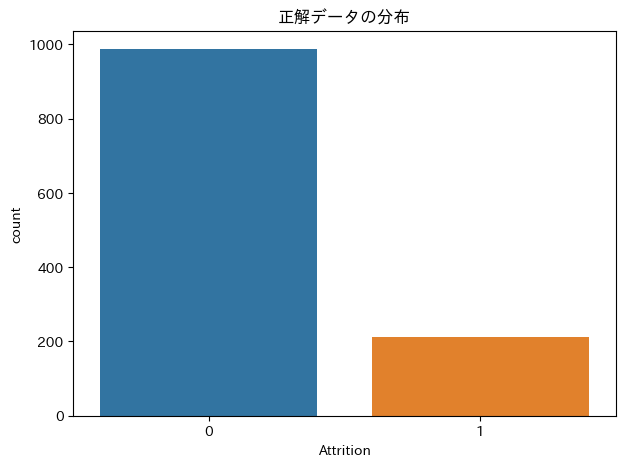

In [11]:
#可視化
plt.figure(figsize=(7,5))
sns.countplot(x=train['Attrition'],data=train)
plt.title('正解データの分布')
plt.show()

カテゴリデータの確認

In [12]:
#オブジェクトのカテゴリデータを見るためのdesribe
train.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
freq,808,773,501,713,252,578,1200,882


In [13]:
test.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,800,800,800,800,800,800,800,800
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,549,529,338,472,173,376,800,585


それでは各特徴量とAttritionとの関係性をグラフで可視化。 初めに数値データの相関係数

In [14]:
train.corr()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,1.000000,0.008049,-0.023238,-0.085798,0.009697,0.010585,-0.053647,-0.001432,0.029047,0.014421,...,NaN,0.027308,-0.009325,-0.010002,-0.020500,-0.031887,-0.018828,-0.029737,-0.014166,-0.003991
Age,0.008049,1.000000,0.111008,-0.025297,0.131860,-0.024145,-0.014442,0.094849,0.244153,0.002939,...,NaN,0.043291,0.211712,0.057582,-0.049930,0.083599,0.087971,0.034947,0.115560,-0.153180
DailyRate,-0.023238,0.111008,1.000000,-0.007701,-0.006446,-0.003083,-0.060843,0.006968,0.012786,-0.002462,...,NaN,0.054490,0.025488,0.014133,-0.051276,-0.084967,-0.053334,-0.101719,-0.013665,-0.060977
DistanceFromHome,-0.085798,-0.025297,-0.007701,1.000000,-0.015443,0.019139,0.006259,0.071221,-0.047849,0.093391,...,NaN,-0.110471,-0.005692,-0.062863,-0.008513,-0.018868,0.025515,0.011279,-0.006011,0.119646
Education,0.009697,0.131860,-0.006446,-0.015443,1.000000,-0.039739,-0.001396,0.043215,0.091630,0.001643,...,NaN,0.068283,0.075499,0.013700,0.044998,0.037616,0.035153,0.049095,0.005762,-0.026255
EnvironmentSatisfaction,0.010585,-0.024145,-0.003083,0.019139,-0.039739,1.000000,-0.081363,0.057379,0.040101,-0.016540,...,NaN,-0.061447,0.068144,-0.014092,0.067810,0.037484,0.017443,0.021978,0.077326,-0.121957
HourlyRate,-0.053647,-0.014442,-0.060843,0.006259,-0.001396,-0.081363,1.000000,-0.004997,-0.039007,-0.050956,...,NaN,0.129041,0.063130,0.007962,-0.060338,0.045971,0.045917,0.018368,0.041716,0.032017
JobInvolvement,-0.001432,0.094849,0.006968,0.071221,0.043215,0.057379,-0.004997,1.000000,0.038279,0.011246,...,NaN,0.050125,0.054303,0.027212,0.012294,0.007608,0.015295,-0.066492,0.037682,-0.024697
JobLevel,0.029047,0.244153,0.012786,-0.047849,0.091630,0.040101,-0.039007,0.038279,1.000000,0.007510,...,NaN,0.023827,0.322058,0.066066,0.022321,0.250385,0.192470,0.131301,0.243459,-0.178115
JobSatisfaction,0.014421,0.002939,-0.002462,0.093391,0.001643,-0.016540,-0.050956,0.011246,0.007510,1.000000,...,NaN,0.017176,0.017228,0.044360,-0.049683,0.012862,0.089152,0.072504,0.045734,-0.027633


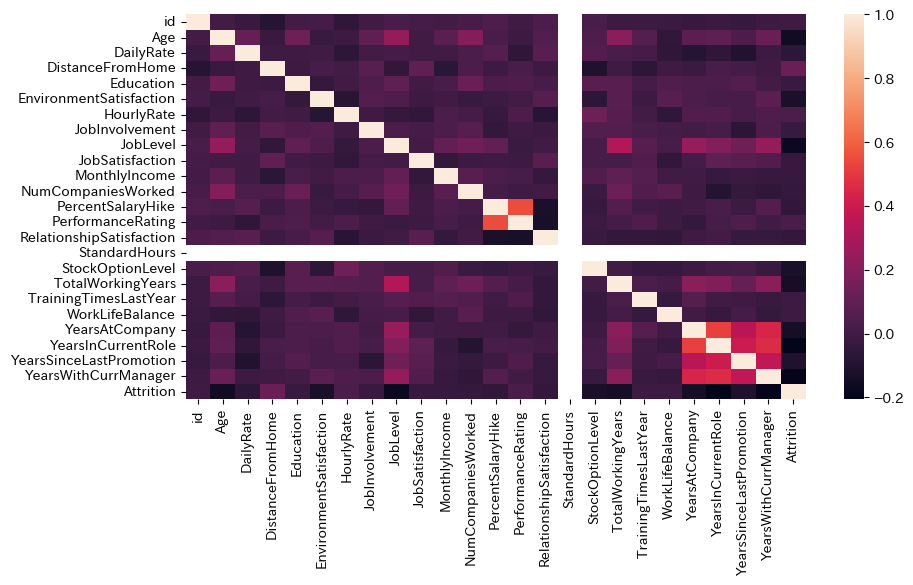

In [15]:
# ヒートマップで可視化
plt.figure(figsize=(10,5))
sns.heatmap(train.corr())
plt.xticks(rotation=90)  # ここを修正
plt.show()


In [16]:
attrition_corr =train.corr()['Attrition'].drop('Attrition')

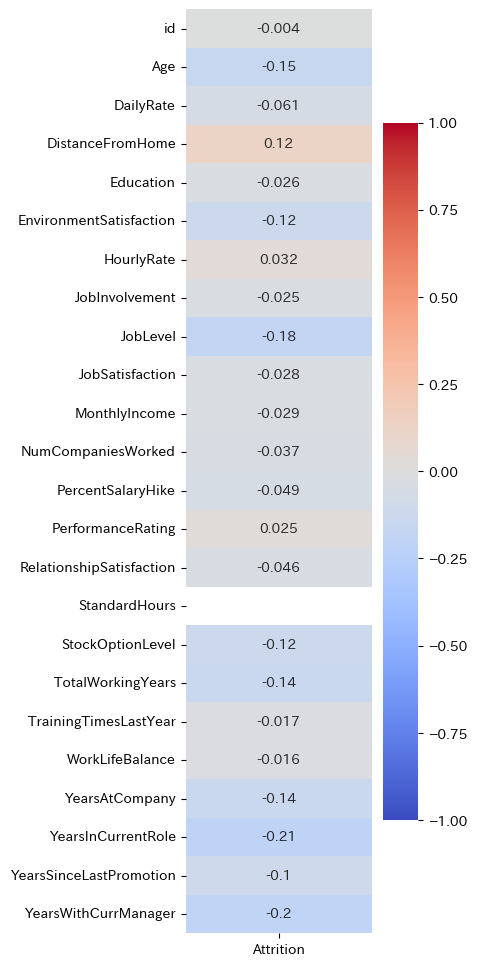

In [17]:
plt.figure(figsize=(3,len(attrition_corr)/2))
sns.heatmap(attrition_corr.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

±0.15以上のものだけ表示

In [18]:
# Calculate the correlation of each feature with 'Attrition'
correlation = train.corr()['Attrition']

# Select features where the absolute correlation with 'Attrition' is 0.15 or more
selected_features = correlation[correlation.abs() >= 0.15]

selected_features


Age                    -0.153180
JobLevel               -0.178115
YearsInCurrentRole     -0.206489
YearsWithCurrManager   -0.200228
Attrition               1.000000
Name: Attrition, dtype: float64

Age（年齢）
JobLevel（職位レベル）
YearsInCurrentRole（現在の役職での年数)
YearsWithCurrManager（現在のマネージャーとの年数）
が相関が比較的ある
それぞれのAttirtionへの影響を可視化する


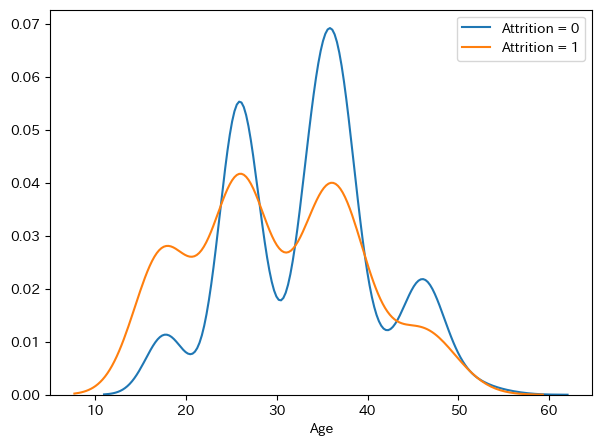

In [19]:
plt.figure(figsize=(7,5))
sns.kdeplot(train[train['Attrition'] == 0]['Age'], label='Attrition = 0')
sns.kdeplot(train[train['Attrition'] == 1]['Age'], label='Attrition = 1')
plt.legend()
plt.ylabel('')
plt.show()

年齢は従業員の離職傾向に影響を及ぼす可能性がある

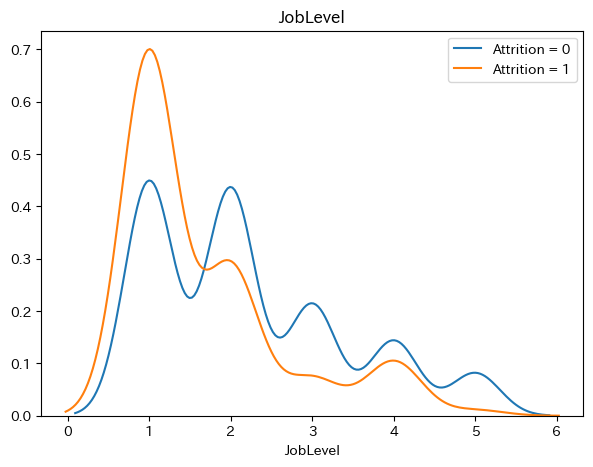

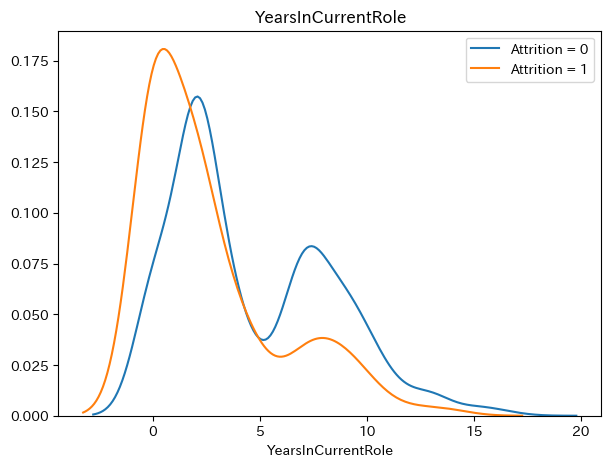

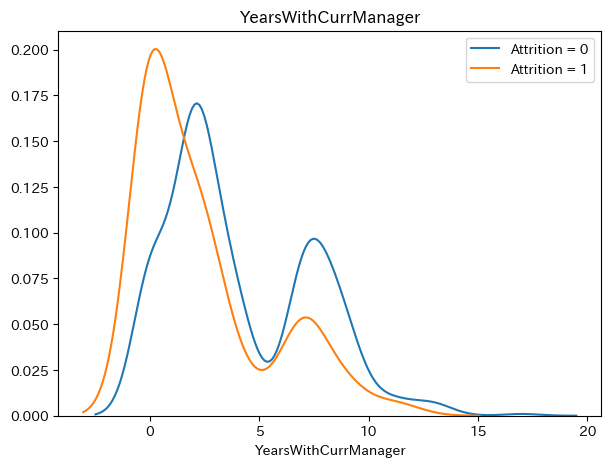

In [20]:
# Create kdeplot for 'JobLevel'
plt.figure(figsize=(7,5))
sns.kdeplot(train[train['Attrition'] == 0]['JobLevel'], label='Attrition = 0')
sns.kdeplot(train[train['Attrition'] == 1]['JobLevel'], label='Attrition = 1')
plt.legend()
plt.ylabel('')
plt.title('JobLevel')
plt.show()

# Create kdeplot for 'YearsInCurrentRole'
plt.figure(figsize=(7,5))
sns.kdeplot(train[train['Attrition'] == 0]['YearsInCurrentRole'], label='Attrition = 0')
sns.kdeplot(train[train['Attrition'] == 1]['YearsInCurrentRole'], label='Attrition = 1')
plt.legend()
plt.ylabel('')
plt.title('YearsInCurrentRole')
plt.show()

# Create kdeplot for 'YearsWithCurrManager'
plt.figure(figsize=(7,5))
sns.kdeplot(train[train['Attrition'] == 0]['YearsWithCurrManager'], label='Attrition = 0')
sns.kdeplot(train[train['Attrition'] == 1]['YearsWithCurrManager'], label='Attrition = 1')
plt.legend()
plt.ylabel('')
plt.title('YearsWithCurrManager')
plt.show()


In [21]:
# 負の値があるように見えるので確認
train['YearsInCurrentRole'].value_counts()

2     329
0     208
7     135
3      91
9      77
4      77
8      74
10     50
1      46
6      28
11     22
5      21
13     20
12      8
15      6
16      4
14      3
17      1
Name: YearsInCurrentRole, dtype: int64

In [22]:
# 負の値があるように見えるので確認
train['YearsWithCurrManager'].value_counts()

2     306
0     239
7     154
3     124
8      95
4      89
9      71
1      52
11     16
5      14
13     11
6      11
10      8
12      7
17      2
14      1
Name: YearsWithCurrManager, dtype: int64

JobLevelについて：JobLevelが低い従業員ほど会社を離れる傾向があるようです。逆に、JobLevelが高いほど会社に留まる傾向が見られます。

YearsInCurrentRole（現在の役職での年数）について：役職での年数が少ない従業員ほど会社を離れる傾向があります。これは、役職での年数が長いほど、その役職に満足している可能性が高いことを示しているかもしれません。

YearsWithCurrManager（現在のマネージャーとの年数）について：現在のマネージャーとの年数が少ない従業員ほど会社を離れる傾向があります。これは、マネージャーとの良好な関係が従業員の定着に貢献している可能性を示しています。

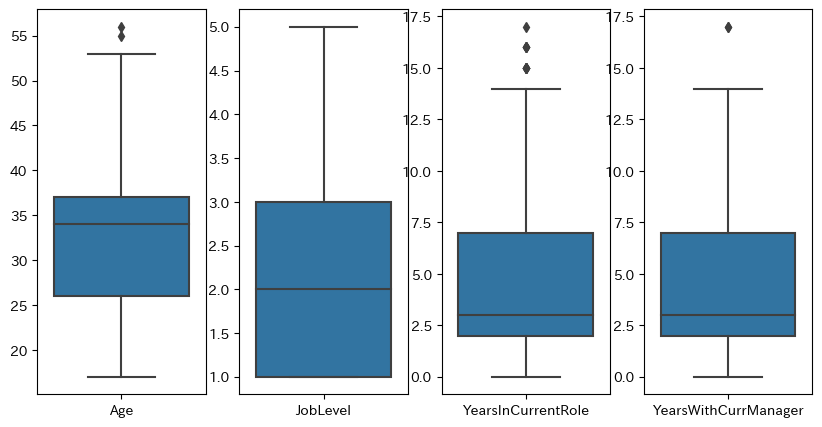

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
sns.boxplot(train[['Age']])

plt.subplot(1, 4, 2)
sns.boxplot(train[['JobLevel']])

plt.subplot(1, 4, 3)
sns.boxplot(train[['YearsInCurrentRole']])

plt.subplot(1, 4, 4)
sns.boxplot(train[['YearsWithCurrManager']])

plt.show()

次にカテゴリデータの確認
関係がありそうなBusinessTravel、Department、JobRoleをみてみる


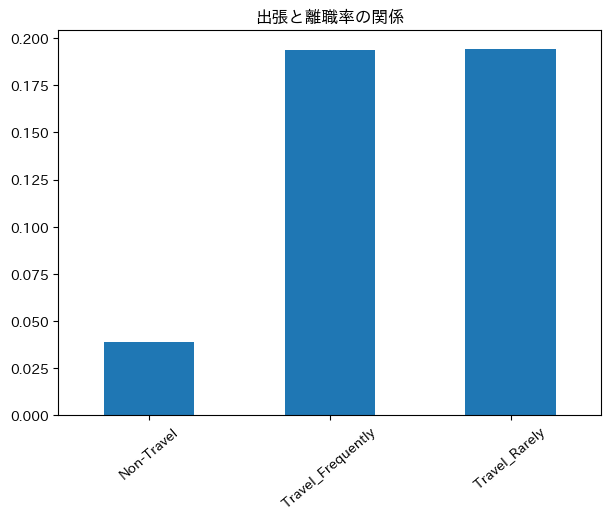

In [24]:
# 出張と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('BusinessTravel')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('出張と離職率の関係')
plt.xlabel('')
plt.show()

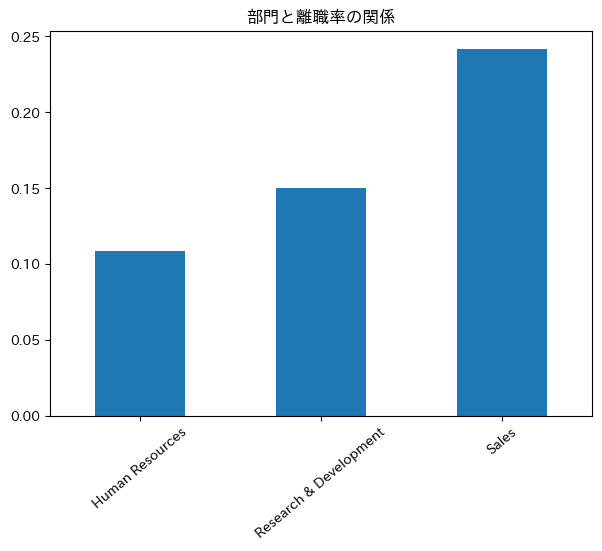

In [28]:
# 部門と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('Department')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('部門と離職率の関係')
plt.xlabel('')
plt.show()

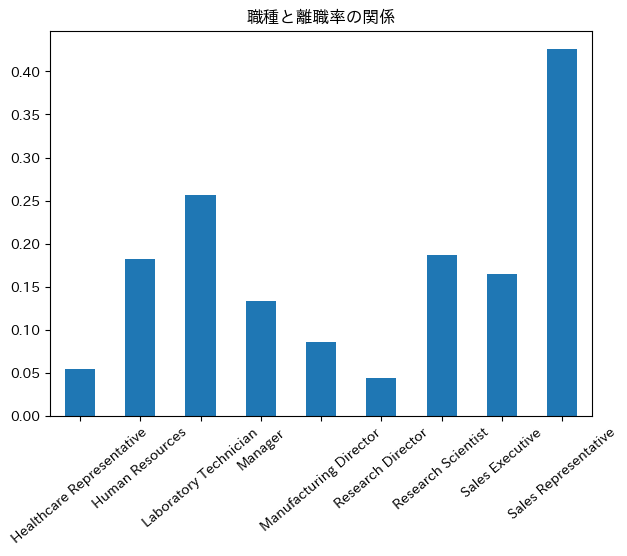

In [30]:
# 職種と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('JobRole')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('職種と離職率の関係')
plt.xlabel('')
plt.show()

出張がある。営業部門、営業職種では離職率との相関がみられる

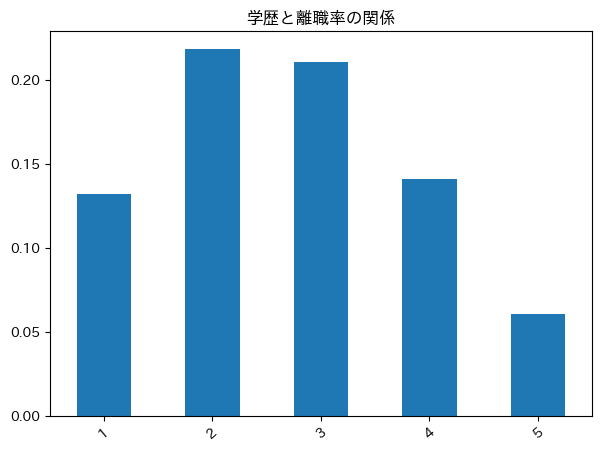

In [31]:
# 学歴と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('Education')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('学歴と離職率の関係')
plt.xlabel('')
plt.show()

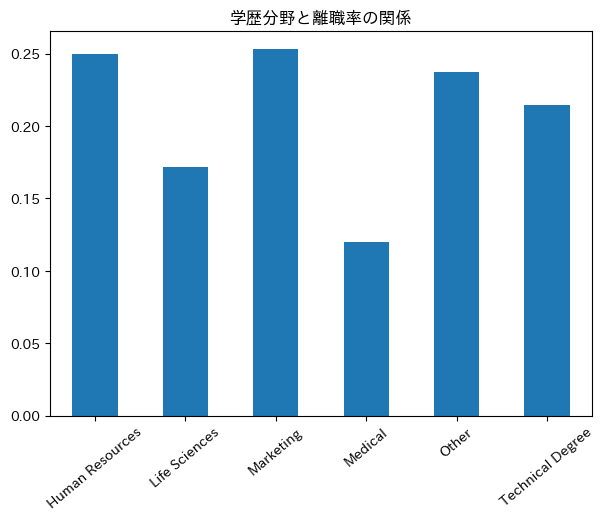

In [32]:
# 学歴分野と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('EducationField')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('学歴分野と離職率の関係')
plt.xlabel('')
plt.show()

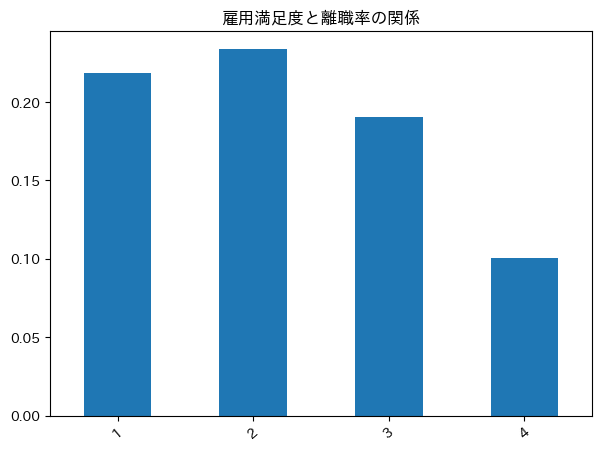

In [33]:
# 雇用満足度と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('EnvironmentSatisfaction')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('雇用満足度と離職率の関係')
plt.xlabel('')
plt.show()

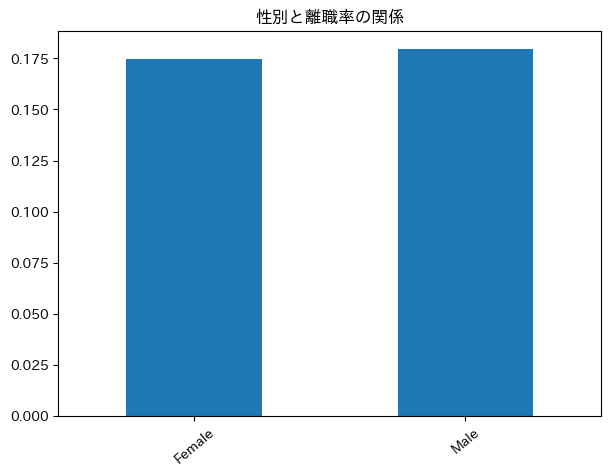

In [34]:
# 性別と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('Gender')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('性別と離職率の関係')
plt.xlabel('')
plt.show()

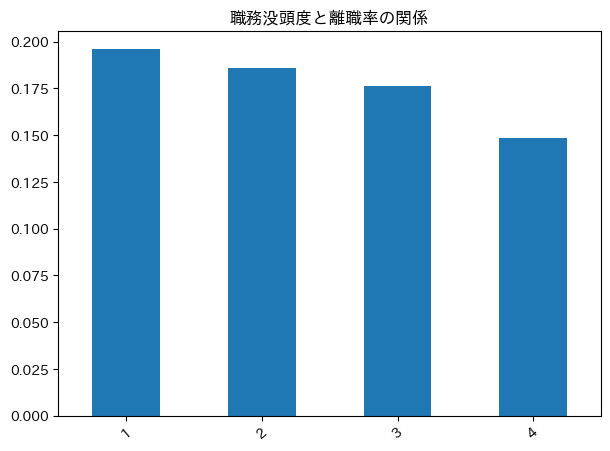

In [35]:
# 職務没頭度と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('JobInvolvement')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('職務没頭度と離職率の関係')
plt.xlabel('')
plt.show()

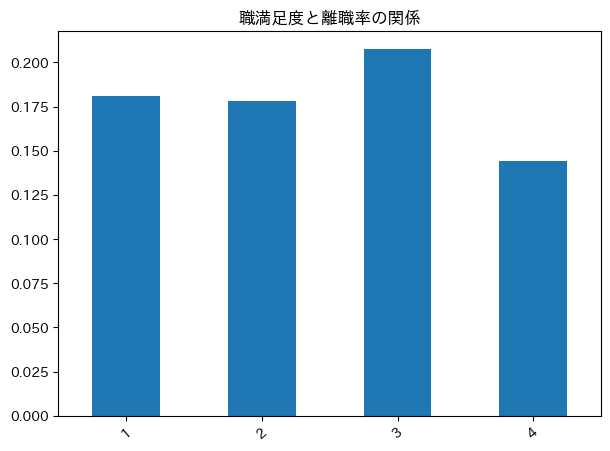

In [36]:
# 職満足度と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('JobSatisfaction')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('職満足度と離職率の関係')
plt.xlabel('')
plt.show()

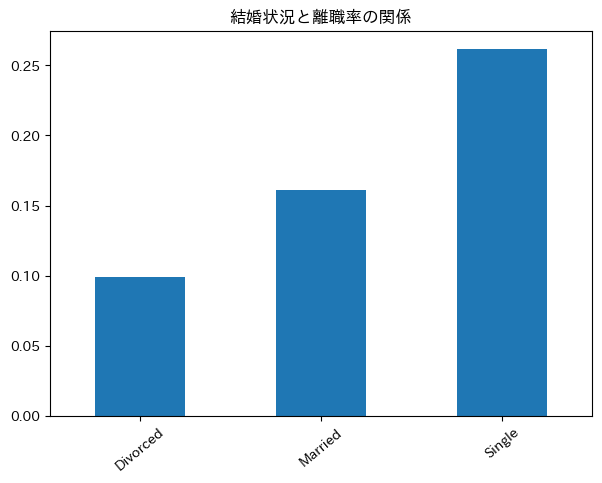

In [37]:
# 結婚状況と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('MaritalStatus')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('結婚状況と離職率の関係')
plt.xlabel('')
plt.show()

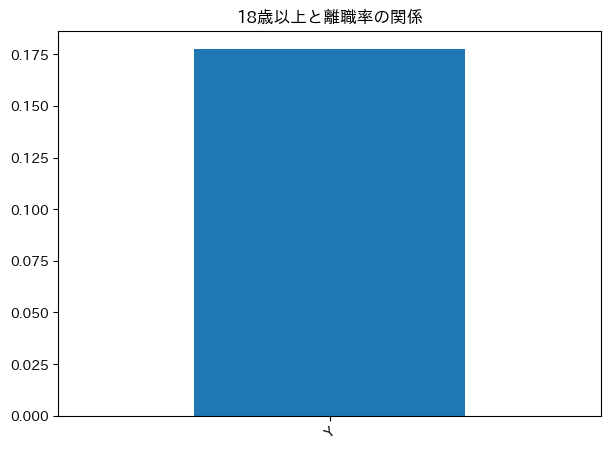

In [38]:
# 18歳以上と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('Over18')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('18歳以上と離職率の関係')
plt.xlabel('')
plt.show()

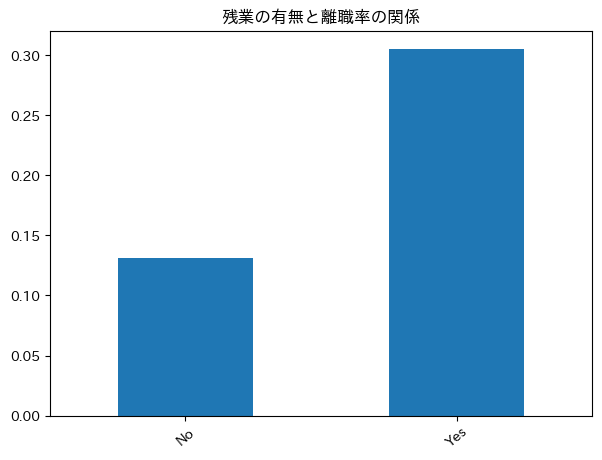

In [39]:
# 残業の有無と離職率の違い
plt.figure(figsize=(7, 5))
train.groupby('OverTime')['Attrition'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('残業の有無と離職率の関係')
plt.xlabel('')
plt.show()

目的関数との相関が高かったAge、JobLevel、YearsInCurrentRole、YearsWithCurrManager
そして可視化したBusinessTravel、Department、JobRole、Education、EducationField、'EnvironmentSatisfaction、'MaritalStatus、OverTimeを特徴量として使用

In [40]:
use_columns = ['Age', 'JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel', 'Department', 'JobRole', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'MaritalStatus', 'OverTime']
Attrition = train['Attrition']
train = train[use_columns]
test = test[use_columns]

In [41]:
train.head()

,Age,JobLevel,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,Department,JobRole,Education,EducationField,EnvironmentSatisfaction,MaritalStatus,OverTime
0,26,1,8,0,Travel_Rarely,Research & Development,Laboratory Technician,3,Medical,4,Single,No
1,47,1,9,4,Travel_Rarely,Research & Development,Research Scientist,3,Technical Degree,2,Divorced,Yes
2,26,1,2,2,Travel_Rarely,Human Resources,Human Resources,3,Life Sciences,2,Married,No
3,46,1,4,7,Travel_Rarely,Research & Development,Laboratory Technician,1,Medical,1,Divorced,Yes
4,25,2,0,0,Travel_Rarely,Research & Development,Manufacturing Director,4,Medical,2,Divorced,Yes


In [42]:
#カテゴリ変数のダミー変数化
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [43]:
display(train.head(), test.head())

,Age,JobLevel,YearsInCurrentRole,YearsWithCurrManager,Education,EnvironmentSatisfaction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,...,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,26,1,8,0,3,4,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,47,1,9,4,3,2,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,26,1,2,2,3,2,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,46,1,4,7,1,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,25,2,0,0,4,2,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1


,Age,JobLevel,YearsInCurrentRole,YearsWithCurrManager,Education,EnvironmentSatisfaction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,...,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,34,1,7,7,3,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,37,1,3,0,3,1,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
2,34,3,3,4,3,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,34,5,6,4,4,3,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,29,2,7,0,2,3,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
print(train.shape)
print(test.shape)

(1200, 26)
(800, 26)
